In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [309]:
%matplotlib inline

In [310]:
print(os.getcwd())

/Users/adamtsuchiyama/Documents/gdp-and-internet-usage-adamtsuch21/notebooks


gdp csv file loaded:

In [311]:
gdp_df = pd.read_csv("/Users/adamtsuchiyama/Documents/gdp-and-internet-usage-adamtsuch21/data/gdp_percapita.csv", nrows=6729)

First 6 rows of gdp:

In [312]:
print(gdp_df.head(6))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
5     Afghanistan  2013  1807.762344              NaN


internet csv file loaded:

In [313]:
internet_df = pd.read_csv("/Users/adamtsuchiyama/Documents/gdp-and-internet-usage-adamtsuch21/data/internet_use.csv", nrows=4495)

First 6 rows of internet:

In [314]:
print(internet_df.head(6))

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN


Shape of gdp: 6729 rows, 4 columns

In [315]:
print(np.shape(gdp_df))

(6729, 4)


Shape of internet: 4495 rows, 4 columns

In [316]:
print(np.shape(internet_df))

(4495, 4)


Data types of gdp:

In [317]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Data types of internet:

In [318]:
print(internet_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


Last 10 rows of gdp:

In [319]:
print(gdp_df.tail(10))

     Country or Area  Year        Value  Value Footnotes
6719        Zimbabwe  1999  3054.064189              NaN
6720        Zimbabwe  1998  3099.076182              NaN
6721        Zimbabwe  1997  3036.422224              NaN
6722        Zimbabwe  1996  2985.856605              NaN
6723        Zimbabwe  1995  2736.486436              NaN
6724        Zimbabwe  1994  2768.309953              NaN
6725        Zimbabwe  1993  2572.870395              NaN
6726        Zimbabwe  1992  2591.007534              NaN
6727        Zimbabwe  1991  2906.272849              NaN
6728        Zimbabwe  1990  2819.549467              NaN


Last 10 rows of internet:

In [320]:
print(internet_df.tail(10))

     Country or Area  Year     Value  Value Footnotes
4485        Zimbabwe  2002  3.994356              NaN
4486        Zimbabwe  2001  0.799846              NaN
4487        Zimbabwe  2000  0.401434              NaN
4488        Zimbabwe  1999  0.161676              NaN
4489        Zimbabwe  1998  0.081648              NaN
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN


Dropped "Value Footnotes" from gdp:

In [321]:
gdp_df = gdp_df.drop("Value Footnotes", axis=1)

In [322]:
print(gdp_df.head())

  Country or Area  Year        Value
0     Afghanistan  2018  1734.723214
1     Afghanistan  2017  1758.465636
2     Afghanistan  2016  1757.023490
3     Afghanistan  2015  1766.593077
4     Afghanistan  2014  1795.735834


Dropped "Value Footnotes" from internet:

In [323]:
internet_df = internet_df.drop("Value Footnotes", axis=1)

In [324]:
print(internet_df.head())

  Country or Area  Year     Value
0     Afghanistan  2014  6.390000
1     Afghanistan  2013  5.900000
2     Afghanistan  2012  5.454545
3     Afghanistan  2011  5.000000
4     Afghanistan  2010  4.000000


Changed gdp column labels:

In [325]:
gdp_df = gdp_df.rename(columns={"Country or Area" : "Country", "Year" : "Year", "Value" : "GDP_Per_Capita"})

In [326]:
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2018     1734.723214
1  Afghanistan  2017     1758.465636
2  Afghanistan  2016     1757.023490
3  Afghanistan  2015     1766.593077
4  Afghanistan  2014     1795.735834


Changed internet column labels:

In [327]:
internet_df = internet_df.rename(columns={"Country or Area" : "Country", "Year" : "Year", "Value" : "Internet_Users_Pct"})

In [328]:
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


Merged gdp and internet:

In [329]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=["Country", "Year"])

First 5 rows of merged dataset:

In [330]:
print(gdp_and_internet_use.head())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2014     1795.735834            6.390000
1  Afghanistan  2013     1807.762344            5.900000
2  Afghanistan  2012     1772.764974            5.454545
3  Afghanistan  2011     1626.764793            5.000000
4  Afghanistan  2010     1671.581238            4.000000


Last 5 rows of merged dataset:

In [331]:
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
3514  Zimbabwe  1997     3036.422224            0.033080
3515  Zimbabwe  1996     2985.856605            0.016790
3516  Zimbabwe  1995     2736.486436            0.007684
3517  Zimbabwe  1994     2768.309953            0.001739
3518  Zimbabwe  1990     2819.549467            0.000000


Shape of merged dataset: 3520 rows, 4 columns

In [332]:
print(np.shape(gdp_and_internet_use))

(3519, 4)


Subset for only years 2004, 2009, 2014:

In [333]:
gdp_and_internet_subset = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]

Top 5 rows of subset:

In [334]:
print(gdp_and_internet_subset.head())

        Country  Year  GDP_Per_Capita  Internet_Users_Pct
0   Afghanistan  2014     1795.735834            6.390000
5   Afghanistan  2009     1502.354073            3.550000
10  Afghanistan  2004     1025.208245            0.105809
13      Albania  2014    10700.993216           60.100000
18      Albania  2009     9525.377979           41.200000


Subset for just 2004:

In [335]:
gdp_int_04 = gdp_and_internet_subset[gdp_and_internet_subset["Year"] == 2004]

Top 5 rows for 2004 subset:

In [336]:
print(gdp_int_04.head())

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
10          Afghanistan  2004     1025.208245            0.105809
23              Albania  2004     7001.054082            2.420388
44              Algeria  2004    11845.170512            4.634475
66               Angola  2004     4604.657044            0.464815
86  Antigua and Barbuda  2004    21161.123532           24.266544


Subset for just 2009:

In [337]:
gdp_int_09 = gdp_and_internet_subset[gdp_and_internet_subset["Year"] == 2009]

Top 5 rows for 2009 subset:

In [338]:
print(gdp_int_09.head())

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
5           Afghanistan  2009     1502.354073                3.55
18              Albania  2009     9525.377979               41.20
39              Algeria  2009    12697.690780               11.23
61               Angola  2009     6292.534856                6.00
81  Antigua and Barbuda  2009    22568.626530               42.00


Subset for just 2014:

In [339]:
gdp_int_14 = gdp_and_internet_subset[gdp_and_internet_subset["Year"] == 2014]

Top 5 rows for 2014 subset:

In [340]:
print(gdp_int_14.head())

                Country  Year  GDP_Per_Capita  Internet_Users_Pct
0           Afghanistan  2014     1795.735834                6.39
13              Albania  2014    10700.993216               60.10
34              Algeria  2014    13557.769757               18.09
56               Angola  2014     6813.052106               21.26
76  Antigua and Barbuda  2014    20440.540555               64.00


Highest internet users pct for 2014: Iceland, 98.16%

In [341]:
print(gdp_int_14[gdp_int_14["Internet_Users_Pct"] == gdp_int_14["Internet_Users_Pct"].max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
1395  Iceland  2014    42774.888849               98.16


Highest internet users pct for 2004: Sweden, 83.89%

In [342]:
print(gdp_int_04[gdp_int_04["Internet_Users_Pct"] == gdp_int_04["Internet_Users_Pct"].max()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
3002  Sweden  2004    40177.850408               83.89


Highest internet users pct for 2009: Iceland, 93.0%

In [343]:
print(gdp_int_09[gdp_int_09["Internet_Users_Pct"] == gdp_int_09["Internet_Users_Pct"].max()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
1400  Iceland  2009    41505.084834                93.0


Lowest internet users pct for 2014: Timor-Leste, 1.14%

In [344]:
print(gdp_int_14[gdp_int_14["Internet_Users_Pct"] == gdp_int_14["Internet_Users_Pct"].min()])

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3104  Timor-Leste  2014     6466.737732                1.14


Lowest internet users pct for 2004: Myanmar, 0.024%

In [345]:
print(gdp_int_04[gdp_int_04["Internet_Users_Pct"] == gdp_int_04["Internet_Users_Pct"].min()])

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2146  Myanmar  2004     1999.710075            0.024337


Lowest internet users pct for 2009: Timor-Leste, 0.18%

In [346]:
print(gdp_int_09[gdp_int_09["Internet_Users_Pct"] == gdp_int_09["Internet_Users_Pct"].min()])

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
3109  Timor-Leste  2009     9275.529371            0.185252


Highest GDP for 2014: Qatar, $116,693.50

In [347]:
print(gdp_int_14[gdp_int_14["GDP_Per_Capita"] == gdp_int_14["GDP_Per_Capita"].max()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
2556   Qatar  2014   116693.507701               91.49


Lowest GDP for 2014: Burundi, $768.47

In [348]:
print(gdp_int_14[gdp_int_14["GDP_Per_Capita"] == gdp_int_14["GDP_Per_Capita"].min()])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
539  Burundi  2014      768.469837                1.38


2004 Internet_Users_Pct vs. GDP_Per_Capita Scatterplot:

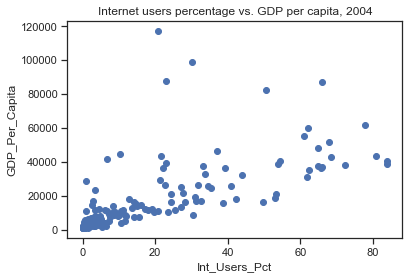

In [349]:
plt.scatter(gdp_int_04["Internet_Users_Pct"], gdp_int_04["GDP_Per_Capita"])
plt.xlabel("Int_Users_Pct")
plt.ylabel("GDP_Per_Capita")
plt.title("Internet users percentage vs. GDP per capita, 2004")
plt.show()

2009 Internet_Users_Pct vs. GDP_Per_Capita Scatterplot:

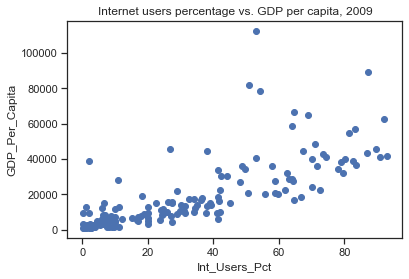

In [350]:
plt.scatter(gdp_int_09["Internet_Users_Pct"], gdp_int_09["GDP_Per_Capita"])
plt.xlabel("Int_Users_Pct")
plt.ylabel("GDP_Per_Capita")
plt.title("Internet users percentage vs. GDP per capita, 2009")
plt.show()

2014 Internet_Users_Pct vs. GDP_Per_Capita Scatterplot:

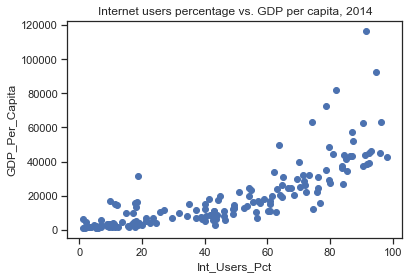

In [351]:
plt.scatter(gdp_int_14["Internet_Users_Pct"], gdp_int_14["GDP_Per_Capita"])
plt.xlabel("Int_Users_Pct")
plt.ylabel("GDP_Per_Capita")
plt.title("Internet users percentage vs. GDP per capita, 2014")
plt.show()

In 2004, there seemed to be little correlation between internet users percentage and GDP per capita, as many of the highest GDP countries still had a relatively low percentage of internet users. In 2009, there started to be a little bit more of a correlation, as those countries with high gdp but low percentage of internet users started to increase their internet users percentage. By 2014, this trend continued, creating a high correlation between the gdp and internet users percentage.

For 2014, the GDP per capita distribution seems to be unimodal, with only one peak near 120000.

The internet use distribution for 2014 also seems to be unimodal, with only one peak near 100 and about 40000 GDP.

Top 5 countries for internet use: Iceland, Norway, Denmark, Luxembourg, Netherlands

In [352]:
print(gdp_int_14.sort_values(by=["Internet_Users_Pct"], ascending=False).head(5))

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
1395      Iceland  2014    42774.888849               98.16
2310       Norway  2014    63328.259526               96.30
854       Denmark  2014    45057.083449               95.99
1812   Luxembourg  2014    92349.186429               94.67
2199  Netherlands  2014    46238.209707               93.17


New subset for top 5 countries for all three years:

In [353]:
top_5_internet = gdp_and_internet_subset[gdp_and_internet_subset["Country"].isin(["Iceland", "Norway", "Denmark", "Luxembourg", "Netherlands"])]

In [354]:
print(top_5_internet)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
854       Denmark  2014    45057.083449               95.99
859       Denmark  2009    43382.615688               86.84
864       Denmark  2004    43670.446201               80.93
1395      Iceland  2014    42774.888849               98.16
1400      Iceland  2009    41505.084834               93.00
1405      Iceland  2004    38893.378798               83.88
1812   Luxembourg  2014    92349.186429               94.67
1817   Luxembourg  2009    89098.734264               87.31
1822   Luxembourg  2004    87209.819367               65.88
2199  Netherlands  2014    46238.209707               93.17
2204  Netherlands  2009    45724.862764               89.63
2209  Netherlands  2004    43048.313770               68.52
2310       Norway  2014    63328.259526               96.30
2315       Norway  2009    62617.153609               92.08
2320       Norway  2004    61612.275634               77.69


Seaborn FacetGrid of internet usage percentage across the three years for each country in the top 5:

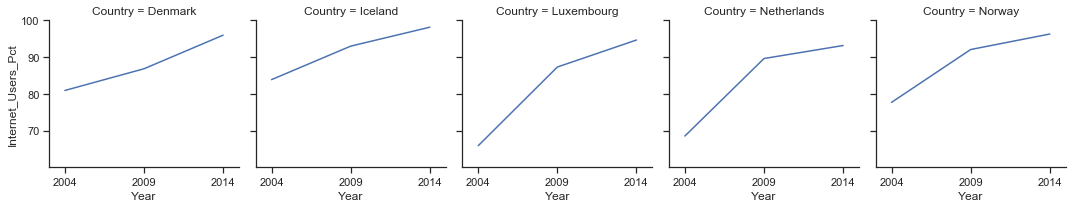

In [355]:
g = sns.FacetGrid(top_5_internet, col="Country").set(xlim=(2003, 2015), ylim=(60, 100), xticks=[2004, 2009, 2014], yticks=[70, 80, 90, 100])
g = g.map(plt.plot, "Year", "Internet_Users_Pct")

Luxembourg had the biggest different between 2004 and 2014, with a 28.79% jump.

The bottom 5 countries by internet users percentage in 2014: Timor-Leste, Burundi, Guinea, Niger, Sierra Leone

In [356]:
print(gdp_int_14.sort_values(by=["Internet_Users_Pct"]).head(5))

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
3104   Timor-Leste  2014     6466.737732                1.14
539        Burundi  2014      768.469837                1.38
1275        Guinea  2014     1836.532318                1.72
2270         Niger  2014      900.136918                1.95
2742  Sierra Leone  2014     1707.097335                2.10


Subset for the bottom 5 countries for each of the three years:

In [357]:
bottom_5_internet = gdp_and_internet_subset[gdp_and_internet_subset["Country"].isin(["Timor-Leste", "Burundi", "Guinea", "Niger", "Sierra Leone"])]

In [358]:
print(bottom_5_internet)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
539        Burundi  2014      768.469837            1.380000
544        Burundi  2009      721.063140            0.900000
549        Burundi  2004      708.833720            0.349060
1275        Guinea  2014     1836.532318            1.720000
1280        Guinea  2009     1626.288463            0.940000
1285        Guinea  2004     1583.864869            0.508819
2270         Niger  2014      900.136918            1.950000
2275         Niger  2009      778.982257            0.760000
2280         Niger  2004      757.751262            0.189934
2742  Sierra Leone  2014     1707.097335            2.100000
2747  Sierra Leone  2009     1172.862734            0.260000
2752  Sierra Leone  2004     1057.693494            0.203008
3104   Timor-Leste  2014     6466.737732            1.140000
3109   Timor-Leste  2009     9275.529371            0.185252


Seaborn FacetGrid of internet usage percentage across the three years for each country in the bottom 5:

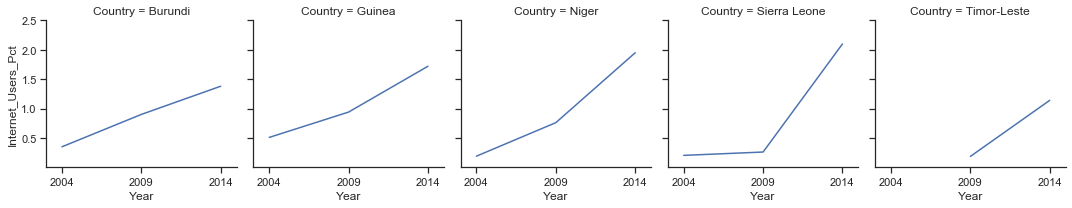

In [359]:
g = sns.FacetGrid(bottom_5_internet, col="Country").set(xlim=(2003, 2015), ylim=(0, 2.5), xticks=[2004, 2009, 2014], yticks=[.5, 1, 1.5, 2, 2.5])
g = g.map(plt.plot, "Year", "Internet_Users_Pct")

Timor-Leste is consistently has the lowest, with no recorded internet users in 2004, 0.18% in 2009, and 1.14% in 2014.

In [360]:
print(gdp_int_14.sort_values(by=["GDP_Per_Capita"]).head(5))

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
539      Burundi  2014      768.469837                1.38
2270       Niger  2014      900.136918                1.95
1856      Malawi  2014     1142.530804                5.83
2116  Mozambique  2014     1222.452874                5.94
1765     Liberia  2014     1257.625441                5.41


Subset for bottom 5 countries across all years:

In [361]:
bot_5_gdp = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(["Burundi", "Niger", "Malawi", "Mozambique", "Liberia"])]

Subset for bottom 5 countries from 2004-2014:

In [362]:
bot_5_10_years = bot_5_gdp[bot_5_countries["Year"].isin([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])]

In [363]:
print(bot_5_10_years)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
539      Burundi  2014      768.469837            1.380000
540      Burundi  2013      760.699070            1.300000
541      Burundi  2012      748.075521            1.220000
542      Burundi  2011      739.219255            1.110000
543      Burundi  2010      733.727723            1.000000
544      Burundi  2009      721.063140            0.900000
545      Burundi  2008      717.792712            0.810000
546      Burundi  2007      707.488696            0.700000
547      Burundi  2006      706.746701            0.657593
548      Burundi  2005      692.569819            0.542143
549      Burundi  2004      708.833720            0.349060
1765     Liberia  2014     1257.625441            5.410000
1766     Liberia  2013     1281.549652            3.200000
1767     Liberia  2012     1211.054620            2.600000
1768     Liberia  2011     1154.409370            2.500000
1769     Liberia  2010     1101.484191            2.3000

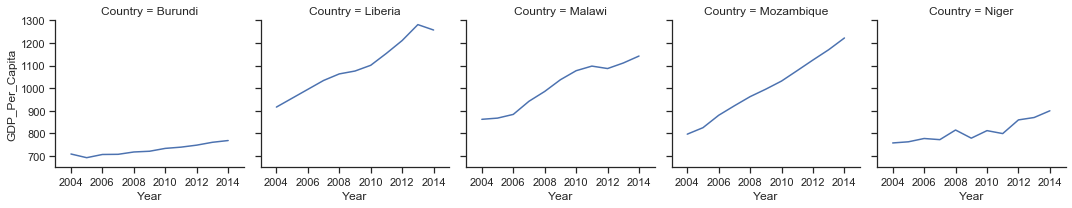

In [364]:
g = sns.FacetGrid(bot_5_10_years, col="Country").set(xlim=(2003, 2015), ylim=(650, 1300), xticks=[2004, 2006, 2008, 2010, 2012, 2014], yticks=[700, 800, 900, 1000, 1100, 1200, 1300])
g = g.map(plt.plot, "Year", "GDP_Per_Capita")

The GDP in Niger was up and down between 2008 and 2012. This most likely had to do with political unrest, as President Mamadou attempted to change Niger from a republic to a military regime in 2009. He was overthrown in a coup in 2010 setting Niger back to a republic with President Issoufou. There was an attempted coup against Issoufou in 2011 but it failed.

Bonus:

In [365]:
equity_df = pd.read_csv("/Users/adamtsuchiyama/Documents/gdp-and-internet-usage-adamtsuch21/data/cpia_equality_rating.csv", nrows=1616)

In [366]:
print(equity_df.tail(10))

     Country or Area  Year  Value  Value Footnotes
1606        Zimbabwe  2014    3.1              NaN
1607        Zimbabwe  2013    2.5              NaN
1608        Zimbabwe  2012    2.4              NaN
1609        Zimbabwe  2011    2.4              NaN
1610        Zimbabwe  2010    1.8              NaN
1611        Zimbabwe  2009    1.6              NaN
1612        Zimbabwe  2008    1.5              NaN
1613        Zimbabwe  2007    1.8              NaN
1614        Zimbabwe  2006    2.0              NaN
1615        Zimbabwe  2005    2.0              NaN


In [367]:
equity_df = equity_df.drop("Value Footnotes", axis=1)

In [368]:
equity_df = equity_df.rename(columns={"Country or Area" : "Country", "Year" : "Year", "Value" : "Equality_Rating"})

In [369]:
print(equity_df)

          Country  Year  Equality_Rating
0     Afghanistan  2018              2.6
1     Afghanistan  2017              2.6
2     Afghanistan  2016              2.6
3     Afghanistan  2015              2.6
4     Afghanistan  2014              2.6
...           ...   ...              ...
1611     Zimbabwe  2009              1.6
1612     Zimbabwe  2008              1.5
1613     Zimbabwe  2007              1.8
1614     Zimbabwe  2006              2.0
1615     Zimbabwe  2005              2.0

[1616 rows x 3 columns]


In [370]:
print(np.shape(equity_df))

(1616, 3)


In [371]:
print(equity_df.dtypes)

Country             object
Year                 int64
Equality_Rating    float64
dtype: object


In [372]:
bonus_joined_df = pd.merge(gdp_and_internet_use, equity_df, on=["Country", "Year"])

In [373]:
print(bonus_joined_df.head())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct  Equality_Rating
0  Afghanistan  2014     1795.735834            6.390000              2.6
1  Afghanistan  2013     1807.762344            5.900000              2.6
2  Afghanistan  2012     1772.764974            5.454545              2.7
3  Afghanistan  2011     1626.764793            5.000000              2.7
4  Afghanistan  2010     1671.581238            4.000000              2.6


In [374]:
print(np.shape(bonus_joined_df))

(634, 5)


In [381]:
bot_5_int_equity = bonus_joined_df[bonus_joined_df["Country"].isin(["Timor-Leste", "Burundi", "Guinea", "Niger", "Sierra Leone"])]

In [382]:
print(bot_5_int_equity)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct  Equality_Rating
91        Burundi  2014      768.469837            1.380000              3.6
92        Burundi  2013      760.699070            1.300000              3.6
93        Burundi  2012      748.075521            1.220000              3.6
94        Burundi  2011      739.219255            1.110000              3.4
95        Burundi  2010      733.727723            1.000000              3.4
96        Burundi  2009      721.063140            0.900000              3.3
97        Burundi  2008      717.792712            0.810000              3.3
98        Burundi  2007      707.488696            0.700000              3.3
99        Burundi  2006      706.746701            0.657593              3.1
100       Burundi  2005      692.569819            0.542143              3.0
206        Guinea  2014     1836.532318            1.720000              3.1
207        Guinea  2013     1813.039625            1.600000              3.0

In [383]:
bot_5_gdp_equity = bonus_joined_df[bonus_joined_df["Country"].isin(["Burundi", "Niger", "Malawi", "Mozambique", "Liberia"])]

In [384]:
print(bot_5_gdp_equity)

        Country  Year  GDP_Per_Capita  Internet_Users_Pct  Equality_Rating
91      Burundi  2014      768.469837            1.380000              3.6
92      Burundi  2013      760.699070            1.300000              3.6
93      Burundi  2012      748.075521            1.220000              3.6
94      Burundi  2011      739.219255            1.110000              3.4
95      Burundi  2010      733.727723            1.000000              3.4
96      Burundi  2009      721.063140            0.900000              3.3
97      Burundi  2008      717.792712            0.810000              3.3
98      Burundi  2007      707.488696            0.700000              3.3
99      Burundi  2006      706.746701            0.657593              3.1
100     Burundi  2005      692.569819            0.542143              3.0
293     Liberia  2014     1257.625441            5.410000              3.0
294     Liberia  2013     1281.549652            3.200000              3.1
295     Liberia  2012    

In [375]:
bonus_joined_14 = bonus_joined_df[bonus_joined_df["Year"] == 2014]

In [376]:
print(bonus_joined_14.sort_values(by=["Equality_Rating"], ascending=False).head(5))

      Country  Year  GDP_Per_Capita  Internet_Users_Pct  Equality_Rating
443    Rwanda  2014     1667.579916               10.60              4.2
55     Bhutan  2014     7770.022409               34.37              4.0
353   Moldova  2014     5711.282367               46.60              4.0
186     Ghana  2014     3791.280251               18.90              3.9
244  Honduras  2014     4162.166942               19.08              3.8


In [377]:
print(bonus_joined_14.sort_values(by=["Equality_Rating"]).head(5))

              Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
494       South Sudan  2014     1817.598265               15.90   
216     Guinea-Bissau  2014     1425.770644                3.32   
121              Chad  2014     2062.345069                2.50   
516             Sudan  2014     4161.895062               24.64   
339  Marshall Islands  2014     3258.331941               16.80   

     Equality_Rating  
494              2.1  
216              2.3  
121              2.5  
516              2.5  
339              2.6  
